In [1]:
import numpy as np
import pandas as  pd
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pickle
import os

In [9]:
df = pd.read_excel("employee_burnout_analysis-AI 2.xlsx")

In [11]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [13]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [15]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [19]:
df.shape

(22750, 9)

In [23]:
df.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [25]:
data["Company Type"].unique()

array(['Service', 'Product'], dtype=object)

In [27]:

data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [29]:


data.size
     

204750

In [31]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [33]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [35]:
data.isnull().sum().values.sum()

4622

In [37]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

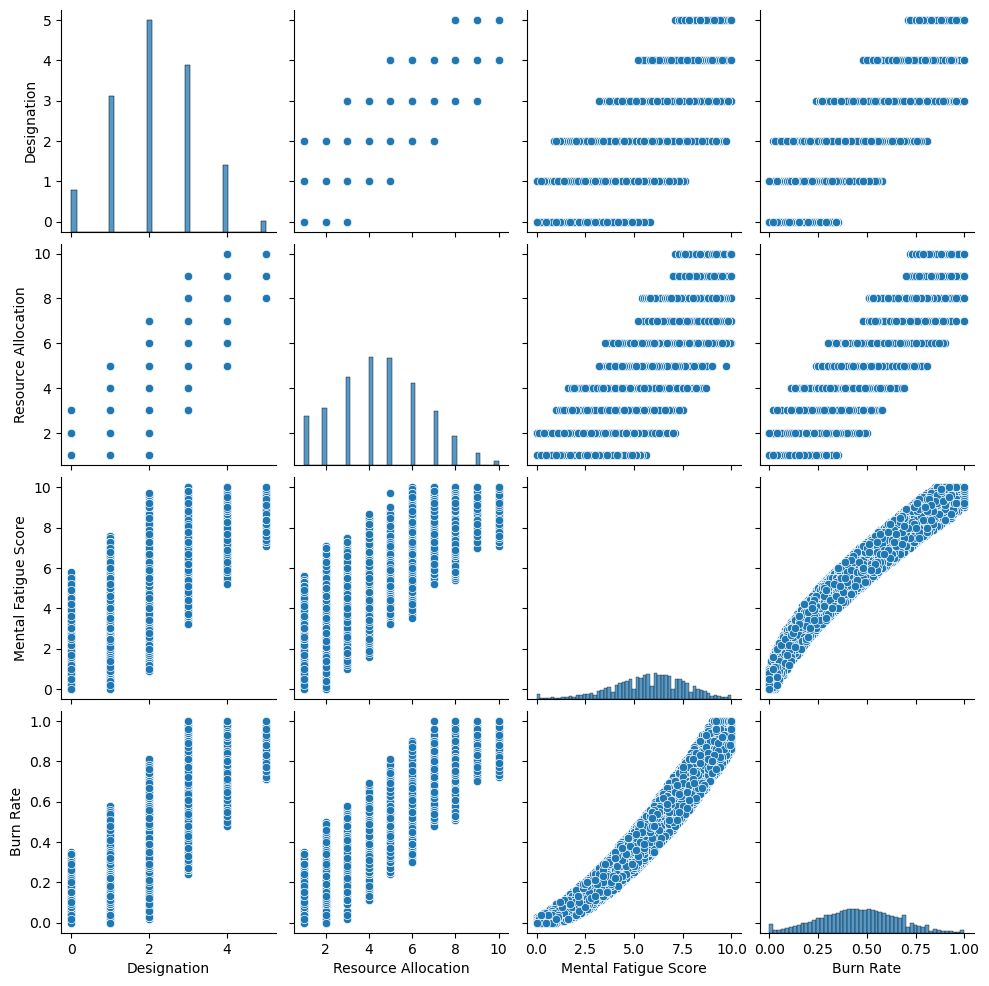

In [39]:
sns.pairplot(data)
plt.show()

In [41]:
data = data.dropna()

In [43]:
data.shape

(18590, 9)

In [45]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [47]:
data_obj = data.select_dtypes(object)
# prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : data_obj[c].unique()[:10] for c in data_obj.columns})

{'Company Type': array(['Service', 'Product'], dtype=object),
 'Employee ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


In [49]:
data = data.drop('Employee ID', axis = 1)

In [51]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29


Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

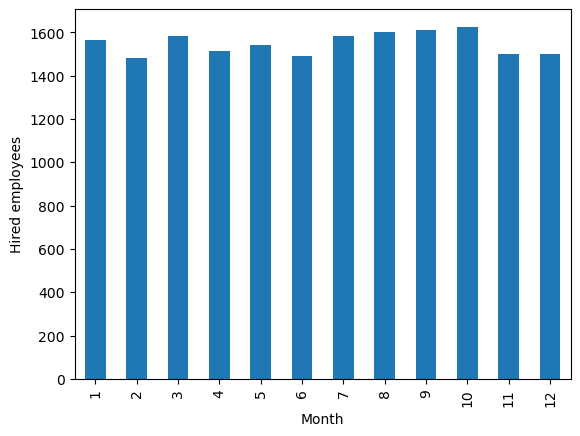

In [53]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining']
data_month["Date of Joining"].groupby(
    data_month['Date of Joining'].dt.month
).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")

In [55]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [57]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [59]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [61]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


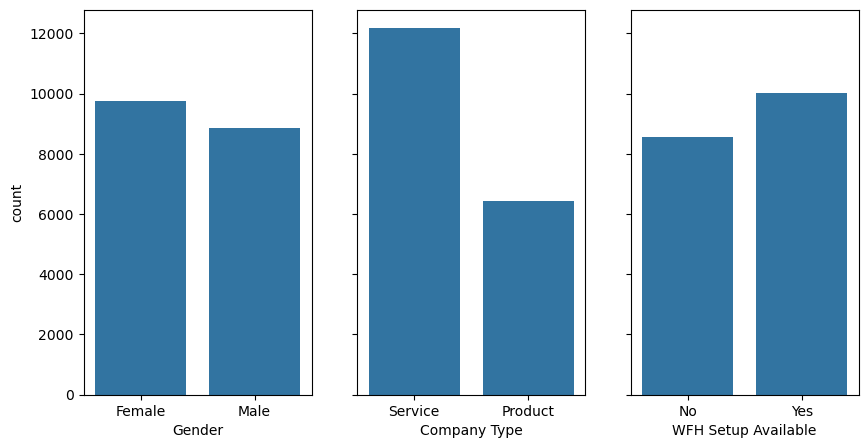

In [63]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

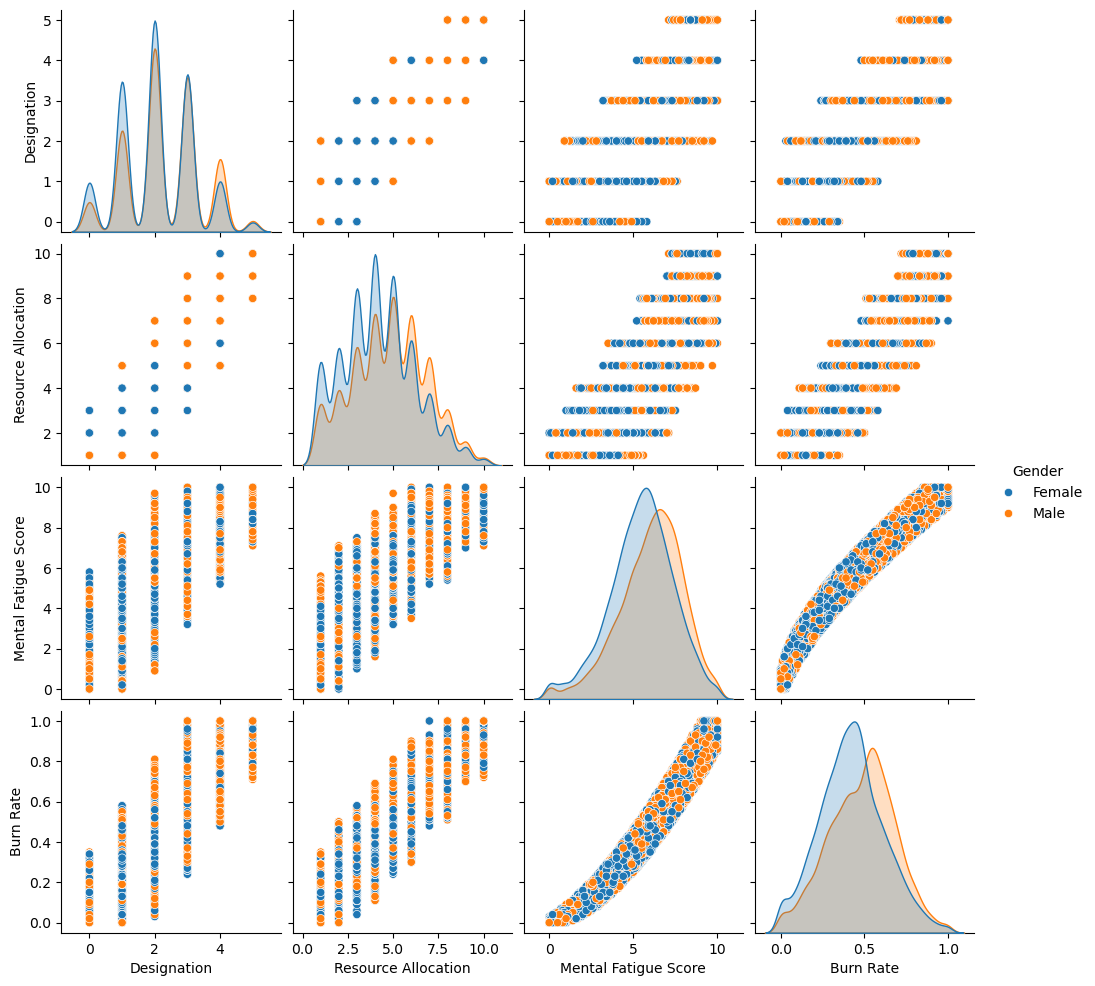

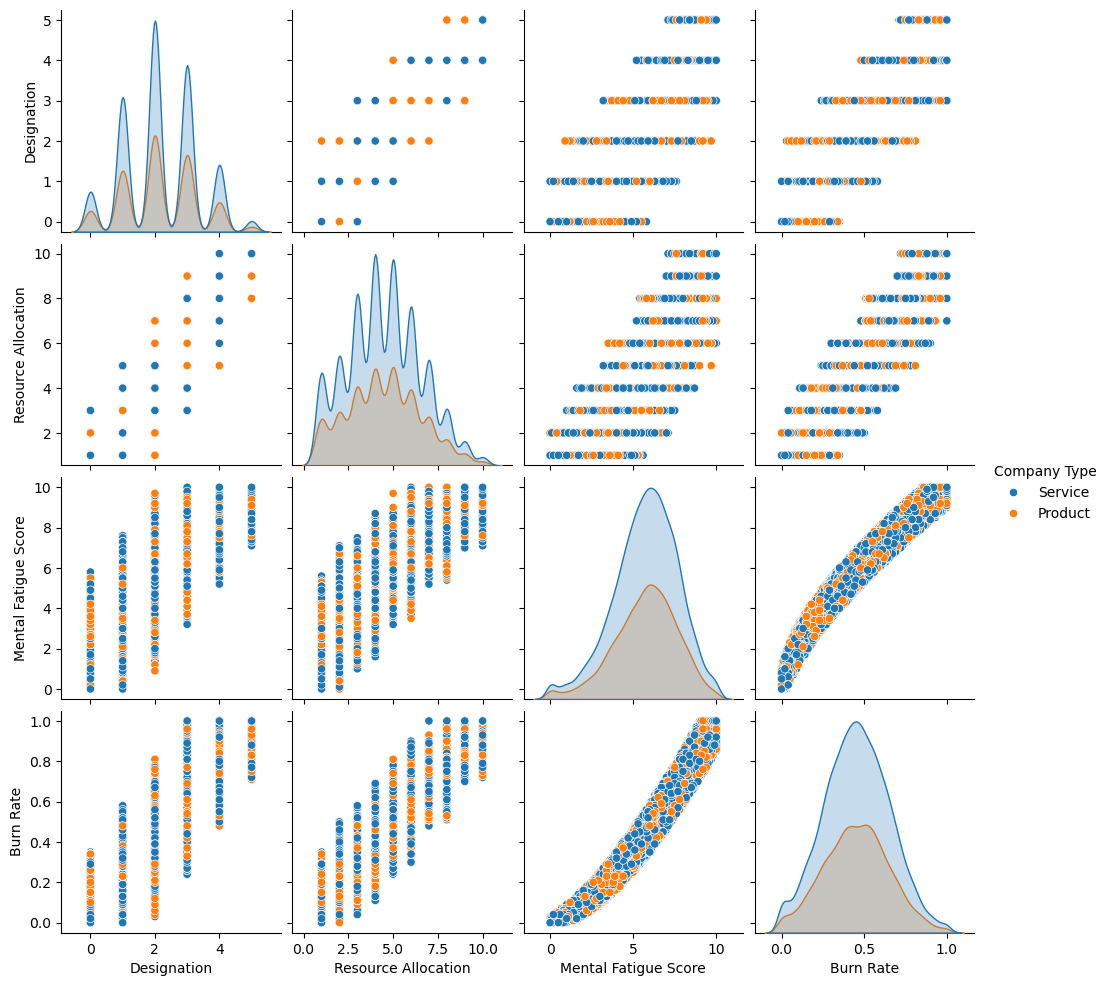

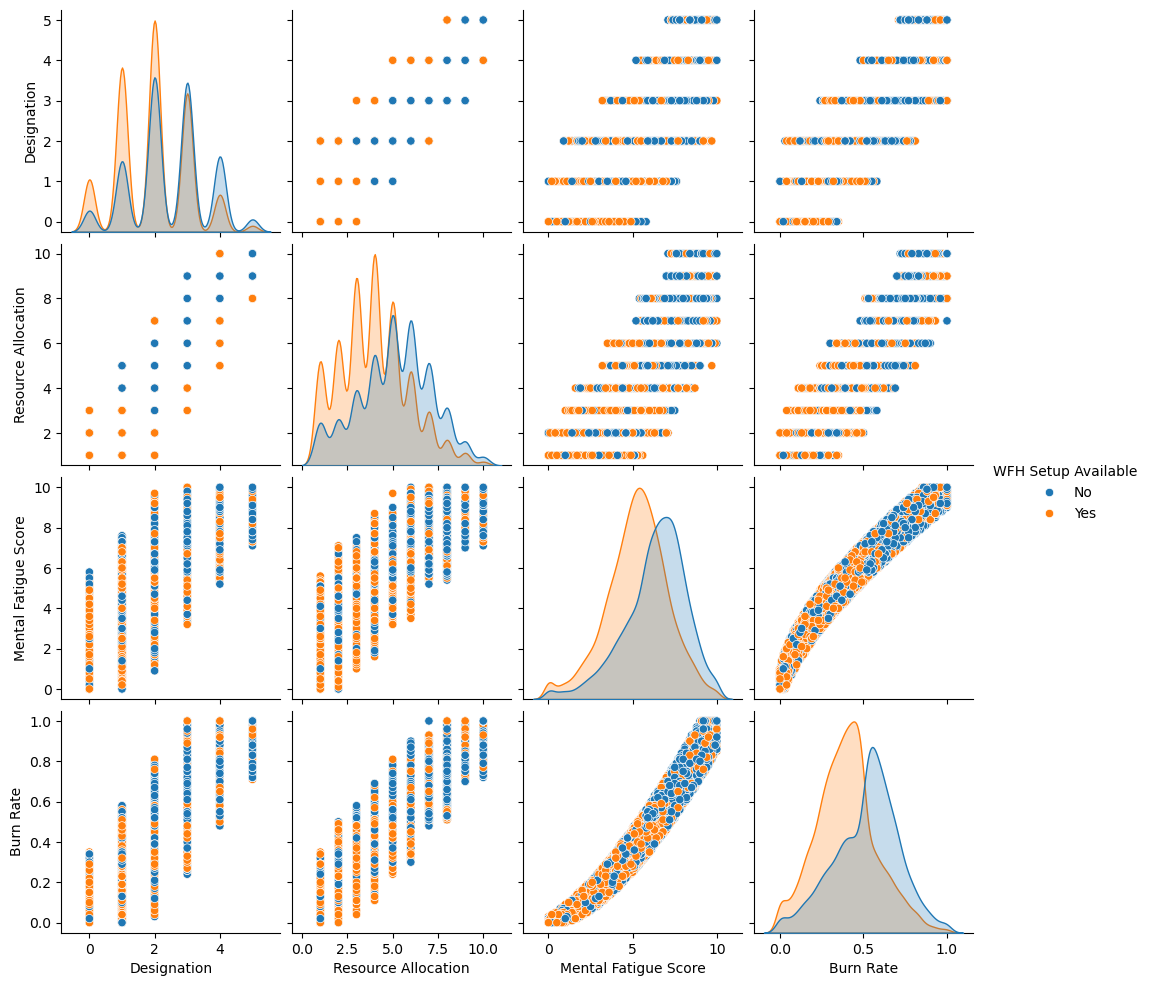

In [65]:
for c in data.select_dtypes(object).columns:
    sns.pairplot(data, hue=c)
plt.show()

In [66]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [67]:
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available',
       'Gender'], drop_first=True)
data.head()
encoded_columns = data.columns

In [68]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [69]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

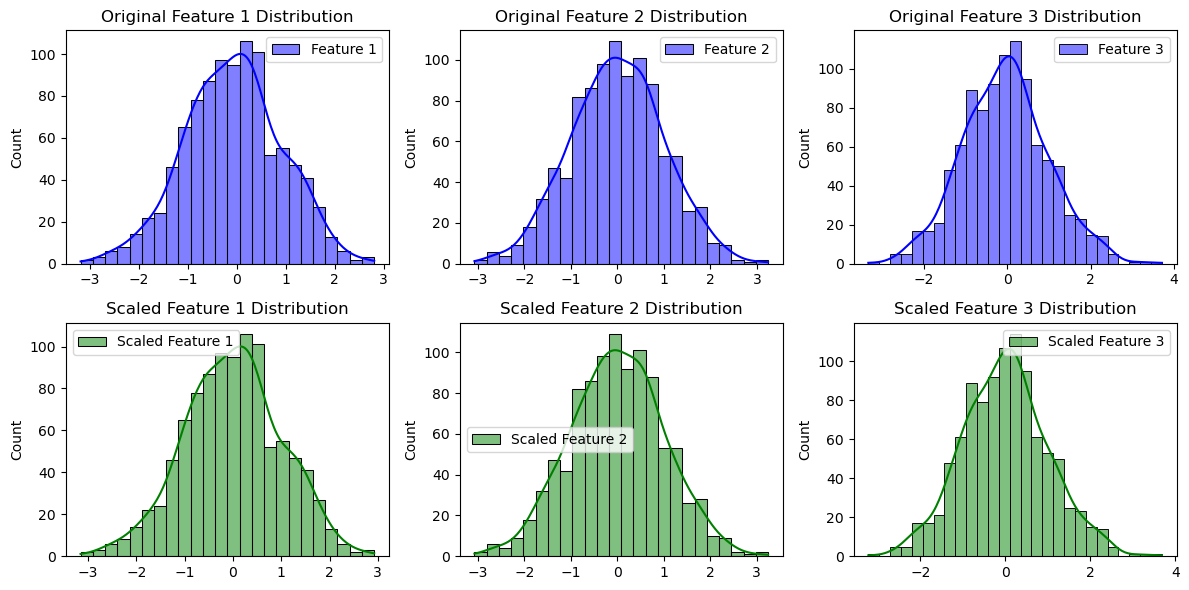

PermissionError: Unable to create the directory. [WinError 5] Access is denied: '../models'
Error while saving the scaler: [Errno 2] No such file or directory: '../models/scaler.pkl'


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
import pickle

# Example Data (replace this with your actual data)
data = np.random.randn(1000, 3)  # 1000 samples, 3 features (for illustration)

# Number of features in the data
num_features = data.shape[1]

# Create a plot for the original distributions
plt.figure(figsize=(12, 6))

# Plot the original data distributions
for i in range(num_features):
    plt.subplot(2, num_features, i + 1)  # 2 rows, num_features columns
    sns.histplot(data[:, i], kde=True, color='blue', label=f'Feature {i+1}')
    plt.title(f'Original Feature {i+1} Distribution')
    plt.legend()

# Apply scaling using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Plot the scaled data distributions
for i in range(num_features):
    plt.subplot(2, num_features, num_features + i + 1)
    sns.histplot(scaled_data[:, i], kde=True, color='green', label=f'Scaled Feature {i+1}')
    plt.title(f'Scaled Feature {i+1} Distribution')
    plt.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Save the scaler
scaler_filename = '../models/scaler.pkl'

# Create the directory if it doesn't exist
parent_dir = os.path.dirname(scaler_filename)
try:
    if not os.path.exists(parent_dir):
        os.makedirs(parent_dir, exist_ok=True)
except PermissionError as e:
    print(f"PermissionError: Unable to create the directory. {e}")
    exit(1)

# Save the scaler to a file using pickle
try:
    with open(scaler_filename, 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)
    print(f"Scaler saved successfully to {scaler_filename}")
except Exception as e:
    print(f"Error while saving the scaler: {e}")


In [90]:
X_train

array([[-0.57048629, -0.54527868,  1.34128315],
       [ 0.15282626, -0.38625296, -0.19516676],
       [-0.48732979, -1.54881479, -0.22166649],
       ...,
       [-1.58570245, -0.60903949, -1.15898709],
       [ 0.24038713, -0.06478432,  0.32248664],
       [ 0.66981818, -1.83716814, -0.48299294]])

In [92]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

In [63]:
import os

# Use a more permissive directory like C:/Temp
path = 'C:/Temp/data/processed/'

# Create the directory if it doesn't exist
try:
    os.makedirs(path, exist_ok=True)
except PermissionError as e:
    print(f"PermissionError: {e}")
    exit(1)

# Now save the processed data (example with dummy data)
import pandas as pd
X_train = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6]})
y_train = pd.Series([0, 1, 1])

# Save the processed data
try:
    X_train.to_csv(path + 'X_train_processed.csv', index=False)
    y_train.to_csv(path + 'y_train_processed.csv', index=False)
    print("Data saved successfully!")
except Exception as e:
    print(f"Error saving data: {e}")

Data saved successfully!


In [65]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [67]:
pip install --upgrade scikit-learn

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [190]:
r2_train = r2_score(y_train, y_train_pred)

In [192]:
y_test_pred = linear_regression_model.predict(X_train)

In [200]:
print("R-squared Score on Training Data:", r2_train)

R-squared Score on Training Data: 0.9999956893597107


In [196]:
y_test_pred = linear_regression_model.predict(X_test)

In [198]:
print("R-squared Score on Testing Data:", r2_test)

R-squared Score on Testing Data: 0.8604327923856752
